In [297]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [299]:
df.columns




Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [300]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [302]:
df = df.drop(['Cabin', 'Ticket', 'Name'], axis = 1)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [304]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [305]:
df['Age'].value_counts().head(20)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
32.0    18
35.0    18
27.0    18
26.0    18
16.0    17
31.0    17
20.0    15
34.0    15
33.0    15
23.0    15
Name: Age, dtype: int64

In [306]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [307]:

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')


df['Age'] = imputer_mean.fit_transform(df[['Age']])


imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df['Embarked'] = imputer_mode.fit_transform(df[['Embarked']])

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


<Axes: xlabel='Sex', ylabel='Survived'>

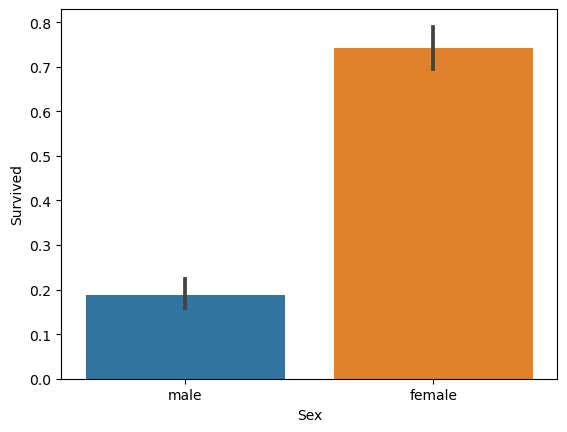

In [309]:
sns.barplot(x= 'Sex', y = 'Survived', data = df)

In [310]:

sex_mapping = {'male': 0, 'female': 1}



df['Sex'] = df['Sex'].map(sex_mapping)




In [311]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [312]:
embarked_mapping = {'S': 0, 'C':1, 'Q':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [313]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [314]:
X = df.drop(['PassengerId', 'Survived'], axis = 1)

In [315]:
y = df['Survived']

In [316]:
X.shape


(891, 7)

In [317]:
y.shape

(891,)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [319]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [320]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [321]:
# Make predictions
y_pred = rf_model.predict(X_test)

# You can then calculate accuracy, F1 score, etc.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report



print(classification_report(y_test, y_pred))

Model Accuracy: 0.8134
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.86      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [322]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [323]:
p_id = df2['PassengerId']

In [324]:
df2 = df2.drop(['Name','Ticket', 'Cabin','PassengerId'], axis = 1)

In [325]:
df2.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [326]:


df2['Age'] = imputer_mean.fit_transform(df2[['Age']])


imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df2['Fare'] = imputer_mode.fit_transform(df2[['Fare']])

In [327]:
df2.isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [328]:
sex_mapping = {'male': 0, 'female': 1}



df2['Sex'] = df2['Sex'].map(sex_mapping)

embarked_mapping = {'S': 0, 'C':1, 'Q':2}
df2['Embarked'] = df2['Embarked'].map(embarked_mapping)

In [329]:
final_pred = rf_model.predict(df2)


In [330]:
final_pred.shape

(418,)

In [332]:
p_id.shape

(418,)

In [334]:
submit = pd.DataFrame({'PassengerId':p_id, 'Survived':final_pred })

In [338]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [339]:
submit.to_csv("rf_titanic.csv", index = False)